In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import pickle

from math import floor

import os

from google.colab import drive
drive.mount('/content/gdrive')

np.random.seed(9001)
#WHAT!? 9000!?!?

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#Load Dataset

In [ ]:
df=pd.read_csv('gdrive/My Drive/Colab Notebooks/TimeSeries/Walmart_Data/W_test.csv')
df.shape

(115064, 6)

In [ ]:
df.head()

,Unnamed: 0,index,Store,Dept,Date,IsHoliday
0,0,0,1,1,2012-11-02,0
1,1,1,1,1,2012-11-09,0
2,2,2,1,1,2012-11-16,0
3,3,3,1,1,2012-11-23,1
4,4,4,1,1,2012-11-30,0


#Shape And Name The Dataset In Accordance To The Demand Of The Model

In [ ]:
def Walmart_Shape(df,ds:str):
  #create aggregate dataframe
  df[ds] = pd.to_datetime(df[ds])
  dates=set(df[ds])
  dates=sorted(dates)
  d = {ds:dates}
  df = pd.DataFrame(data=d)
  df=df.rename(columns={ds:'ds'})
  return df

In [ ]:
df=Walmart_Shape(df,'Date')

#Forecasting

In [ ]:
def forecast(df,binNum=None):
  corp_model=open("gdrive/My Drive/Colab Notebooks/TimeSeries/Walmart_Notebooks/Prophet_Models/W_Corp_Prophet.sav", "rb")
  stores0_model=open("gdrive/My Drive/Colab Notebooks/TimeSeries/Walmart_Notebooks/Prophet_Models/W_Stores0_Prophet.sav", "rb")
  stores1_model=open("gdrive/My Drive/Colab Notebooks/TimeSeries/Walmart_Notebooks/Prophet_Models/W_Stores1_Prophet.sav", "rb")
  stores2_model=open("gdrive/My Drive/Colab Notebooks/TimeSeries/Walmart_Notebooks/Prophet_Models/W_Stores2_Prophet.sav", "rb")
  binSelect = {
    None: pickle.load(corp_model),
    0:  pickle.load(stores0_model),
    1:  pickle.load(stores1_model),
    2:  pickle.load(stores2_model)
  }
  model=binSelect.get(binNum,'Invalid Bin')
  if type(model)==str:
    print(model) 
    return 
  prediction=model.predict(df)
  print('Prediction before inverse transform\n',prediction.describe())
  model.plot(prediction)
  plt.show()
  #Transforming the model information into the context of dollars
  prediction['yhat']=invT(prediction['yhat'],17.42223935895342,17.963360969252093)
  prediction['yhat_lower']=invT(prediction['yhat'],17.42223935895342,17.963360969252093)
  prediction['yhat_upper']=invT(prediction['yhat'],17.42223935895342,17.963360969252093)
  print('Prediction after inverse transform')
  print('Prediction description\n',prediction['yhat'].describe())
  print(prediction['yhat'])
  #print(prediction.describe())

In [ ]:

def invT(targ,min,max):
  targ=targ.apply(lambda x:x*(max-min))
  targ=targ.apply(lambda x:x+min)
  targ=targ.apply(lambda x:np.exp(x))
  return targ

Prediction before inverse transform
            trend  yhat_lower  ...  multiplicative_terms_upper       yhat
count  39.000000   39.000000  ...                        39.0  39.000000
mean    0.314011    0.227655  ...                         0.0   0.333556
std     0.003829    0.146005  ...                         0.0   0.145089
min     0.307631   -0.126016  ...                         0.0  -0.016507
25%     0.310821    0.166541  ...                         0.0   0.275015
50%     0.314011    0.210494  ...                         0.0   0.317164
75%     0.317201    0.263126  ...                         0.0   0.367728
max     0.320391    0.630965  ...                         0.0   0.733618

[8 rows x 15 columns]


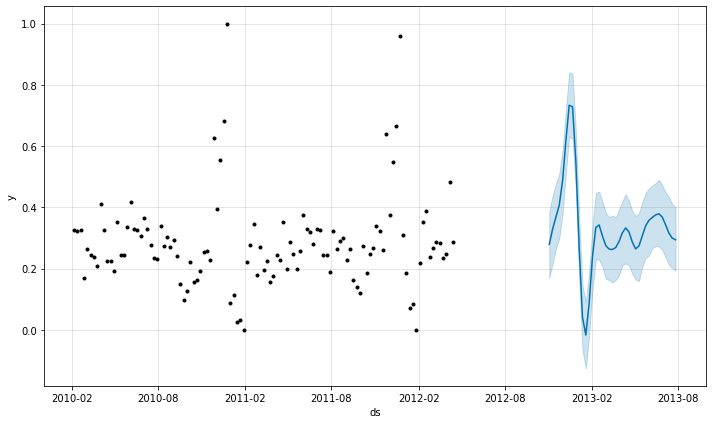

Prediction after inverse transform
Prediction description
 count    3.900000e+01
mean     4.426884e+07
std      3.582927e+06
min      3.651768e+07
25%      4.275754e+07
50%      4.374394e+07
75%      4.495737e+07
max      5.480082e+07
Name: yhat, dtype: float64
0     4.285782e+07
1     4.402788e+07
2     4.497065e+07
3     4.593436e+07
4     4.794467e+07
5     5.144892e+07
6     5.480082e+07
7     5.464939e+07
8     4.960716e+07
9     4.261853e+07
10    3.768033e+07
11    3.651768e+07
12    3.860435e+07
13    4.193844e+07
14    4.415243e+07
15    4.435596e+07
16    4.349993e+07
17    4.277069e+07
18    4.250004e+07
19    4.247574e+07
20    4.262087e+07
21    4.307451e+07
22    4.374394e+07
23    4.412578e+07
24    4.380324e+07
25    4.302594e+07
26    4.251839e+07
27    4.274439e+07
28    4.351625e+07
29    4.428201e+07
30    4.471876e+07
31    4.494408e+07
32    4.514890e+07
33    4.523964e+07
34    4.497848e+07
35    4.437185e+07
36    4.372903e+07
37    4.333207e+07
38    4.321071e+

In [ ]:
forecast(df)